In [1]:
#import libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import json 


### Exploratory Data Analysis (EDA)


1.  Data Loading & Inspection
-  Load the CSV into pandas (or your preferred environment).
- Show the shape of the dataset, column types, and any anomalies.


In [2]:
#load data 
data = pd.read_csv("movies.csv")

#create copy of data for analysis 
df = data.copy()

#check the shape 
shape = df.shape
print(f"The dataset has {shape[0]} rows and {shape[1]} columns\n")

#information about the data 
df.info()

The dataset has 4803 rows and 24 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non

In [3]:
#visualize the data 
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


##### Numerical anomalies 

In [4]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create a dictionary to hold the zero count in each column 
zero_counts = {col: (df[col] == 0).sum() for col in numerical_columns}

# Display the counts
for col, count in zero_counts.items():
    print(f"{col}: {count} ")

index: 1 
budget: 1037 
id: 0 
popularity: 1 
revenue: 1427 
runtime: 35 
vote_average: 63 
vote_count: 62 


- We observe that almost all numerical columns contain missing data represented by 0
- We check the distribution of this phenomenon across the dataset
- The columns most affected by this phenomenon are  budget and revenue with about 30 % missing values

##### anomalies in categorical columns 

In [5]:
#select categorical columns 
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_summary = df.describe(include=['object', 'category'])
categorical_summary

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew,director
count,4775,1712,4391,4803,4803,4800,4803,4803,4802,4803,4803,3959,4803,4760,4803,4773
unique,1168,1691,4219,37,4801,4800,3697,469,3280,544,3,3944,4800,4741,4776,2349
top,Drama,http://www.missionimpossible.com/,independent film,en,Out of the Blue,"In the 22nd century, a paraplegic Marine is di...",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,William Shatner Leonard Nimoy DeForest Kelley ...,[],Steven Spielberg
freq,370,4,55,4505,2,1,351,2977,10,3171,4795,3,2,6,28,27


In [6]:
# check for duplicate movies 
duplicates = df[df.duplicated()]
print(f"The number of duplicates in the data: {len(duplicates)}")

#convert release date to date time 
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

The number of duplicates in the data: 0


In [7]:
df['status'].value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

- Our dataset contains movies that have not been released
- A very high percentage of movies do not have a  homepage
- There is a title and original title column, we will keep only original title to redice dimensionality 

2. Descriptive Statistics
- Basic stats: average budget, average revenue, distribution of vote_average or runtime.
- Identify the top 10 highest-grossing movies, or highest budget.
- Look for relationships between numeric columns (e.g., correlation between budget and revenue).


In [8]:
# statistical info about numerical columns 
df.describe()

,index,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4802,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,2002-12-27 23:45:54.352353280,8.226064e+07,106.875859,6.092172,690.217989
min,0.000000,0.000000e+00,5.000000,0.000000,1916-09-04 00:00:00,0.000000e+00,0.000000,0.000000,0.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,1999-07-14 00:00:00,0.000000e+00,94.000000,5.600000,54.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,2005-10-03 00:00:00,1.917000e+07,103.000000,6.200000,235.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,2011-02-16 00:00:00,9.291719e+07,118.000000,6.800000,737.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2017-02-03 00:00:00,2.787965e+09,338.000000,10.000000,13752.000000
std,1386.651002,4.072239e+07,88694.614033,31.816650,NaN,1.628571e+08,22.611935,1.194612,1234.585891


- The avergae budget is: 29,045,040
- The average revenue is: 82,260,640


Text(0.5, 1.0, 'Distribution of vote average')

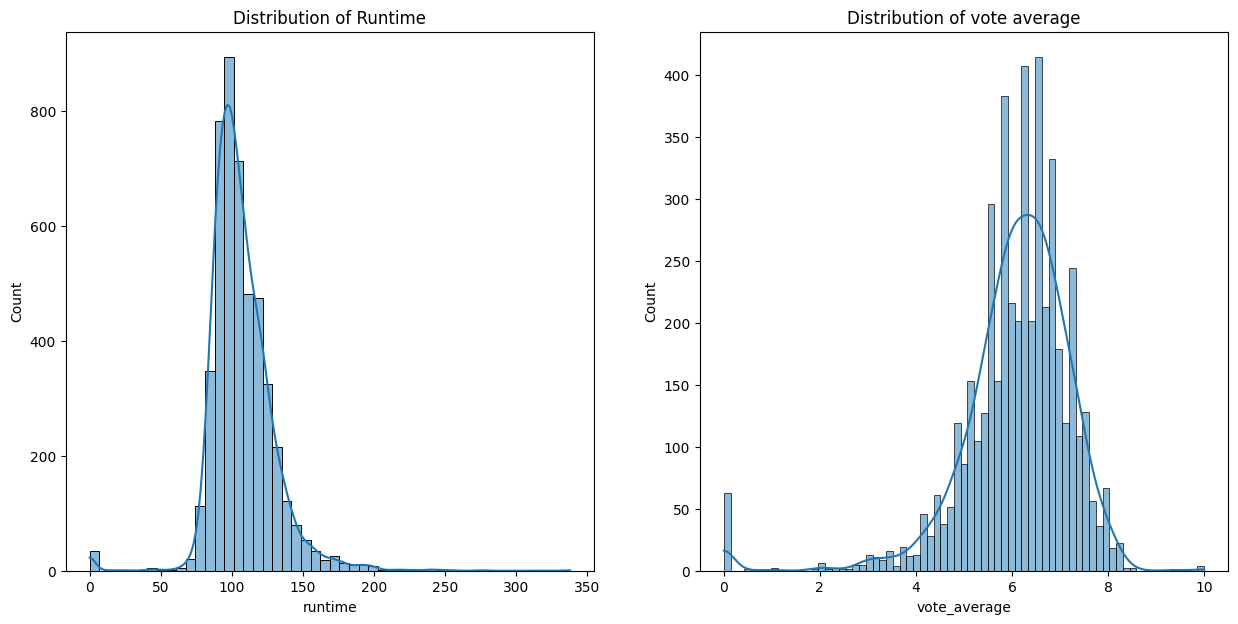

<Figure size 800x600 with 0 Axes>

In [9]:
#distribution of runtime 
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.figure(figsize=(8, 6))
sns.histplot(df['runtime'].dropna(), bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Runtime')

sns.histplot(df['vote_average'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribution of vote average')

In [10]:
# top 10 grossing movies 

revenue_df = df.sort_values(by='revenue', ascending=False, ignore_index=True)
print(f"top 10 movies by revenue: \n ")
revenue_df.head(10)[["title", "revenue"]]

top 10 movies by revenue: 
 


,title,revenue
0,Avatar,2787965087
1,Titanic,1845034188
2,The Avengers,1519557910
3,Jurassic World,1513528810
4,Furious 7,1506249360
5,Avengers: Age of Ultron,1405403694
6,Frozen,1274219009
7,Iron Man 3,1215439994
8,Minions,1156730962
9,Captain America: Civil War,1153304495


In [11]:
# Highest budget movies 
budget_df = df.sort_values(by='budget', ascending=False, ignore_index=True)
print(f"top 10 movies by budget: \n ")
budget_df.head(10)[["title", "budget"]]

top 10 movies by budget: 
 


,title,budget
0,Pirates of the Caribbean: On Stranger Tides,380000000
1,Pirates of the Caribbean: At World's End,300000000
2,Avengers: Age of Ultron,280000000
3,Superman Returns,270000000
4,John Carter,260000000
5,Tangled,260000000
6,Spider-Man 3,258000000
7,The Lone Ranger,255000000
8,X-Men: Days of Future Past,250000000
9,The Hobbit: The Desolation of Smaug,250000000


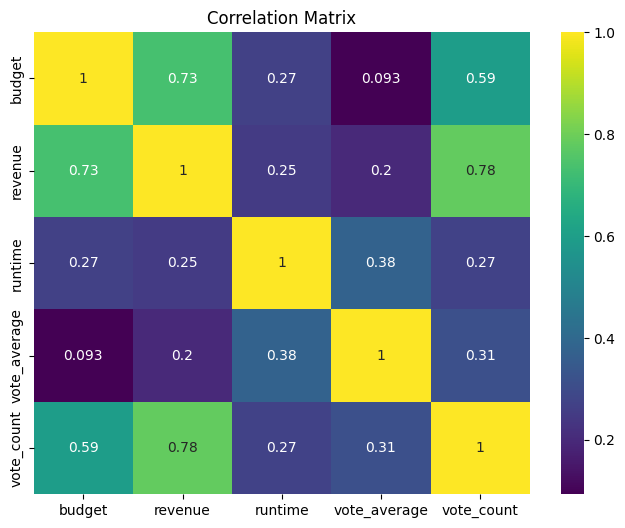

In [12]:
#correlation between numerical columns 

corr_matrix = df[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis")
plt.title('Correlation Matrix')
plt.show()


- Movies with high budget tend to make high revenue
- High revenue is highly correlated with vote_count 

3. Genre & Language Analysis
- Which genres are most common?
- Which languages are most common? (e.g., count how often original_language = “en”, “fr”, etc.)

In [13]:
# most common genres

genres_df = df['genres'].str.split(' ').explode()
genres_df.value_counts()[:10]

genres
Drama        2297
Comedy       1722
Thriller     1259
Action       1153
Romance       890
Adventure     790
Crime         696
Fiction       530
Science       530
Horror        519
Name: count, dtype: int64

- The most common genres are: Drama, Comedy, Thriller and Action, no other genre appears up to 1000 times

In [14]:
# most common languages

#parse languages as json
df['spoken_languages'] = df['spoken_languages'].apply(json.loads)

#extract language names 
languages = df['spoken_languages'].explode().dropna().apply(lambda x: x['name'])
languages.value_counts()

spoken_languages
English        4485
Français        437
Español         351
Deutsch         262
Italiano        188
               ... 
বাংলা             1
Català            1
??????            1
Bamanankan        1
Slovenščina       1
Name: count, Length: 62, dtype: int64

4. Visualizations
Create 1–2 plots (e.g., bar chart of top genres, scatter plot of budget vs. revenue).


Text(0.5, 1.0, 'Relationship between Budget and Revenue')

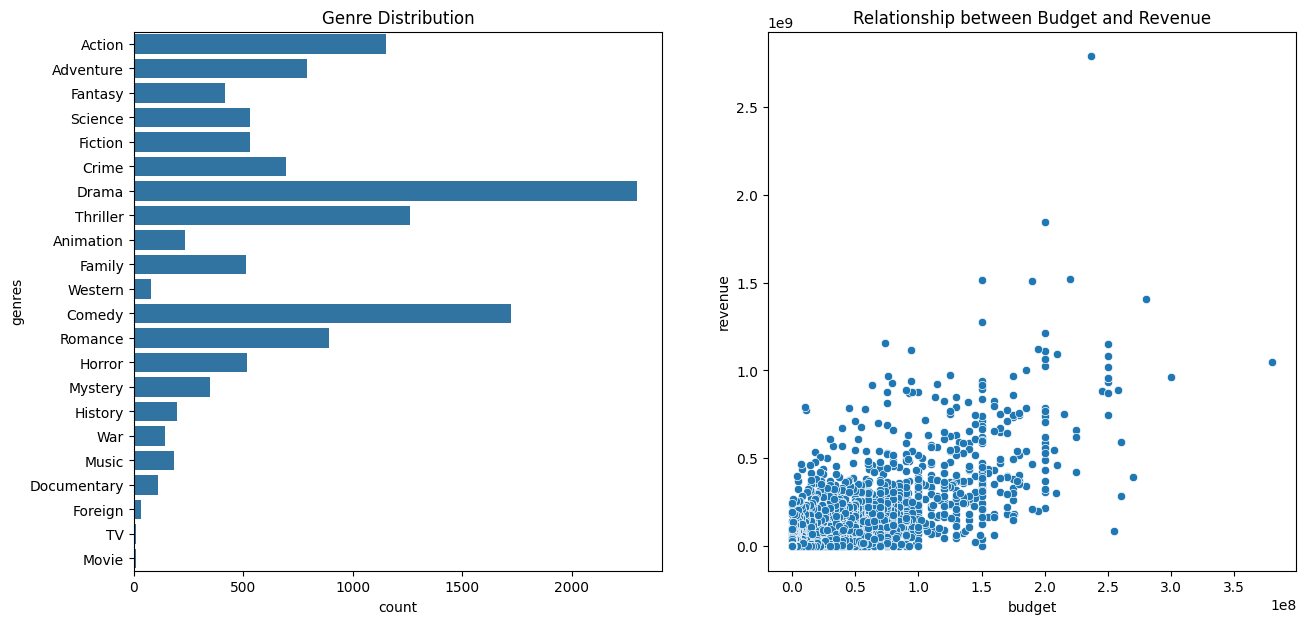

<Figure size 1000x600 with 0 Axes>

In [15]:
#distribution of runtime 
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.figure(figsize=(10, 6))
sns.countplot(genres_df.dropna(), ax=axes[0])
axes[0].set_title('Genre Distribution')

sns.scatterplot(x=df['budget'].dropna(), y=df['revenue'].dropna(), ax=axes[1])
axes[1].set_title('Relationship between Budget and Revenue')

#### 2. Data Cleaning & Feature Engineering
- Handle Missing or Irrelevant Data
- Check for NaN values or unexpected data in columns like genres, cast, budget, etc.
- Decide if you drop rows/columns or fill them with placeholders.
- Parsing / Transforming Fields
For textual fields like genres or keywords (which might look like JSON), parse them into a more workable format (e.g., lists of genre names).
You may also parse out the main cast or the director from crew.
Feature Creation
For recommendation or analysis, you might create a “combined features” column that merges title, keywords, cast, or genres.
Consider normalizing numeric features (e.g., budget, popularity) if needed for modeling.


##### handling missing values 

In [16]:
#check for missing values 
nulls = df.isnull()
null_cols = nulls.sum()[nulls.any()]
print(f"columns with missing values:\n {null_cols}\n")

# drop homepage column, too many missing rows and not as important in recommendations 
# drop budget and revenue as they are not important for recommendations, and contain too many 0 values as seen above
df.drop(columns=["homepage", "budget", "revenue"], inplace=True)

#fill missing text columns with empty string
missing_text_cols = ["genres", "keywords", "overview", "tagline", "cast", "director"]
for col in missing_text_cols: 
    df[col] = df[col].fillna("")

#fill runtime with mean runtime value
mean_runtime = df['runtime'].mean()
df['runtime'] = df['runtime'].fillna(mean_runtime)

#There is only one missing release date so we can find the actual release date
df['release_date'] = df['release_date'].fillna(2015)

#use only released movies 
df = df[df['status'] == "Released"]

nulls = df.isnull()
null_cols = nulls.sum()[nulls.any()]
print(f"missing values after cleaning\n {null_cols}")

columns with missing values:
 genres            28
homepage        3091
keywords         412
overview           3
release_date       1
runtime            2
tagline          844
cast              43
director          30
dtype: int64

missing values after cleaning
 Series([], dtype: int64)


In [17]:
#parse columns into more workable format
df['genres'] = df['genres'].apply(lambda x: x.split() if isinstance(x, str) else [''])
df['cast'] = df['cast'].apply(lambda x: x.split() if isinstance(x, str) else [''])

#created combined features column
df['combined_features'] = df['title'].fillna('') + ' ' + \
                          df['keywords'].apply(lambda x: ''.join(x)) + ' ' + \
                          df['cast'].apply(lambda x: ''.join(x)) + ' ' + \
                          df['genres'].apply(lambda x: ''.join(x))

#normalize columns with standard scaler since each column is on a 
scaler = StandardScaler()
norm_cols = ['runtime', 'vote_average', 'vote_count', 'popularity']
df[norm_cols] = scaler.fit_transform(df[norm_cols])

#drop columns that will not be used for modelling
df.drop(columns=["index", "title", "crew", "production_companies", "production_countries", "status"], inplace=True)

#save cleaned data
df.to_csv("./cleaned_data.csv")

#visualize cleaned data
df.head()

,genres,id,keywords,original_language,original_title,overview,popularity,release_date,runtime,spoken_languages,tagline,vote_average,vote_count,cast,director,combined_features
0,"[Action, Adventure, Fantasy, Science, Fiction]",19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",4.050184,2009-12-10 00:00:00,2.441353,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Enter the World of Pandora.,0.929848,8.993617,"[Sam, Worthington, Zoe, Saldana, Sigourney, We...",James Cameron,Avatar culture clash future space war space co...
1,"[Adventure, Fantasy, Action]",285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",3.693426,2007-05-19 00:00:00,2.751591,"[{'iso_639_1': 'en', 'name': 'English'}]","At the end of the world, the adventure begins.",0.677787,3.083496,"[Johnny, Depp, Orlando, Bloom, Keira, Knightle...",Gore Verbinski,Pirates of the Caribbean: At World's End ocean...
2,"[Action, Adventure, Crime]",206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,2.697272,2015-10-26 00:00:00,1.820876,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",A Plan No One Escapes,0.173665,3.055969,"[Daniel, Craig, Christoph, Waltz, L\u00e9a, Se...",Sam Mendes,Spectre spy based on novel secret agent sequel...
3,"[Action, Crime, Drama, Thriller]",49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,2.852359,2012-07-16 00:00:00,2.574312,"[{'iso_639_1': 'en', 'name': 'English'}]",The Legend Ends,1.265929,6.812539,"[Christian, Bale, Michael, Caine, Gary, Oldman...",Christopher Nolan,The Dark Knight Rises dc comics crime fighter ...
4,"[Action, Adventure, Science, Fiction]",49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",0.703765,2012-03-07 00:00:00,1.111759,"[{'iso_639_1': 'en', 'name': 'English'}]","Lost in our world, found in another.",0.005625,1.159873,"[Taylor, Kitsch, Lynn, Collins, Samantha, Mort...",Andrew Stanton,John Carter based on novel mars medallion spac...
